Outlier Detection in Network Data using Python
Evaluate network traffic data to identify outliers in numerical attributes like Packet Size and Duration. Use statistical measures to detect unusual values.
Tasks:
1.	Calculate z-scores for numeric variables.
2.	Identify and visualize outliers using boxplots.
3.	Generate a summary of detected anomalies.



In [39]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('datasets/data_4.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Packet_ID    50 non-null     int64
 1   Packet_Size  50 non-null     int64
 2   Duration     50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [41]:
numeric_cols = ['Packet_Size', 'Duration']
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df['Outlier'] = (z_scores > 3).any(axis=1)

In [42]:
print("\nDetected Outliers:")
print(df[df['Outlier'] == True])


Detected Outliers:
    Packet_ID  Packet_Size  Duration  Outlier
49         50         6800       230     True


<Axes: ylabel='Packet_Size'>

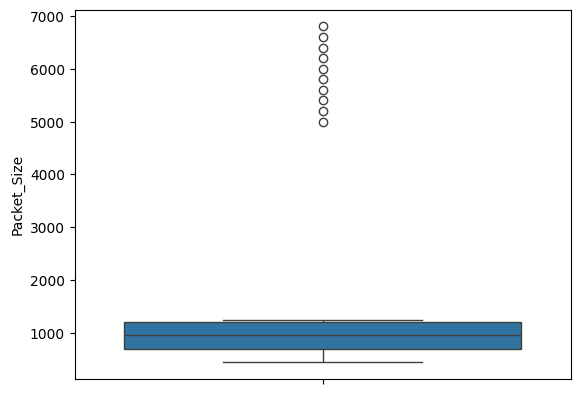

In [43]:
sns.boxplot(data=df['Packet_Size'])

<Axes: ylabel='Duration'>

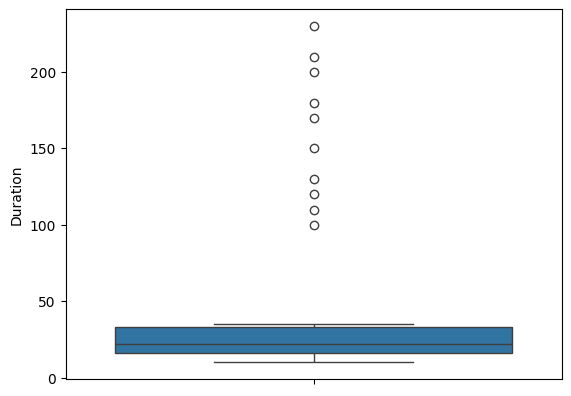

In [44]:
sns.boxplot(data=df['Duration'])

In [47]:
total_outliers = df['Outlier'].sum()
print(f"\nSummary: {total_outliers} outliers detected out of {len(df)} total records.")


Summary: 1 outliers detected out of 50 total records.
